# Normalizacia vstupov

Ukazeme si, aky je rozdiel v rychlosti ucenia, ak pouzivame normalizovane a nenormalizovane vstupy.

In [1]:
import numpy as np

from backstage.utils import dataset_Circles, dataset_Flower, draw_DecisionBoundary, draw_TrainingResults, draw_Scatter
from backstage.layer import Input, Dense, DropOut
from backstage.loss import CreateLossFunction
from backstage.optimizer import GradientDescent
from backstage.model import Model

## 1. Transformacia datasetu

Nase ukazkove datasety maju vlastnost, ze su uz normalizovane - ich stredna hodnota (mean) je 0, a variancia je 1.
V tejto ukazke si dataset "pokazime" a zmenime mu vlastnosti. V skutocnom svete by sme postupovali s najvacsou pravdepodobnostou naopak - nase povodne data by neboli normalizovane, a my by sme ich potrebovali normalizovat.

Pre tuto ukazku je ale dolezite mat dva datasety s roznymi vlastnostami.


In [2]:
def dataset(m, noise=0.0, mean=0.0, stddev=1.0):
    X, Y = dataset_Flower(m=m, noise=noise)
    # Upravime vlastnosti pre X
    X = (stddev * X) + mean
    return X, Y

def prepareDatasets(m, noise=0.2, mean=0.0, stddev=1.0):

    # Normalized
    X1, Y1 = dataset(m, noise=noise, mean=0.0, stddev=1.0)

    # Denormalized dataset
    X2, Y2 = dataset(m, noise=noise, mean=mean, stddev=stddev)
    return X1, Y1, X2, Y2


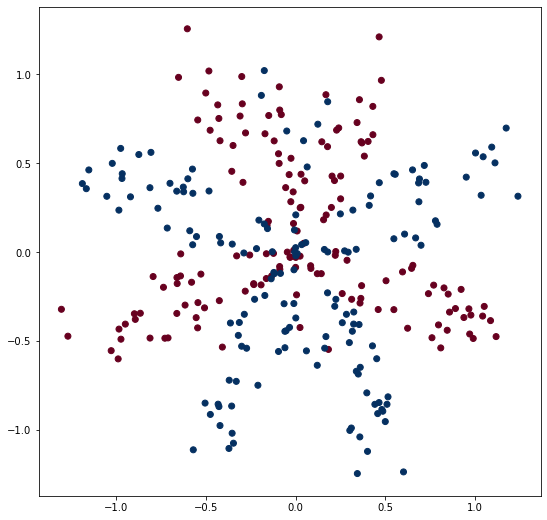

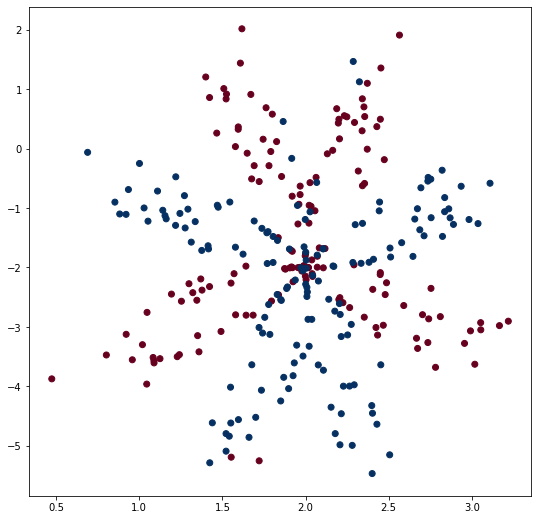

In [3]:
def test_datasetTransform(m):

    mean   = np.array([[2.0], [-2.0]], dtype=float)
    stddev = np.array([[1.0], [3.0]], dtype=float)

    # Najskor ziskame povodny - normalizovany dataset
    X1, Y1, X2, Y2 = prepareDatasets(m, noise=0.2, mean=mean, stddev=stddev)

    # Nakreslime obidva
    draw_Scatter(X1, Y1)
    draw_Scatter(X2, Y2)

test_datasetTransform(300)

## 2. Ucenie

Skusime teraz naucit rovnaky model na obidva datasety. Budeme pouzivat model s DropOut vrstvou, ako naposledy.


In [4]:
def test_TwoDatasets(setsTrain, setsDev, layers, epochs=50000):

    def trainModel(X, Y, devX, devY, epochs, layers, name):        
        print('Training model : ', name)
        # Train & Draw results
        model = Model(layers)
        model.initialize(loss=CreateLossFunction('bce'), optimizer=GradientDescent(0.03))
        results = model.train(X, Y, epochs, 0, devX, devY, verboseInterval=5000)
        draw_TrainingResults(results)
        draw_DecisionBoundary(devX, devY, model)

    # Rozbalime si datasety
    X1, Y1, X2, Y2 = setsTrain
    devX1, devY1, devX2, devY2 = setsDev

    # Najskor naucime prvy, potom druhy
    trainModel(X1, Y1, devX1, devY1, epochs, layers, 'Normalized Dataset')
    trainModel(X2, Y2, devX2, devY2, epochs, layers, 'Denormalized Dataset')


A skusime teraz naucit obidva datasety.

Training model :  Normalized Dataset
Epoch 0:  Loss = 1.4043874   Val_Loss = 0.9860377
Epoch 5000:  Loss = 0.4198343   Val_Loss = 0.3596430
Epoch 10000:  Loss = 0.4178056   Val_Loss = 0.3138291
Epoch 15000:  Loss = 0.3591833   Val_Loss = 0.2943162
Epoch 20000:  Loss = 0.3366218   Val_Loss = 0.2830534
Epoch 25000:  Loss = 0.3332172   Val_Loss = 0.2752408
Epoch 30000:  Loss = 0.3527985   Val_Loss = 0.2699469
Epoch 35000:  Loss = 0.3312013   Val_Loss = 0.2671580
Epoch 40000:  Loss = 0.3579027   Val_Loss = 0.2643092
Epoch 45000:  Loss = 0.3246487   Val_Loss = 0.2608077
Training complete.
Epoch 49999:  Loss = 0.3258656   Val_Loss = 0.2595451


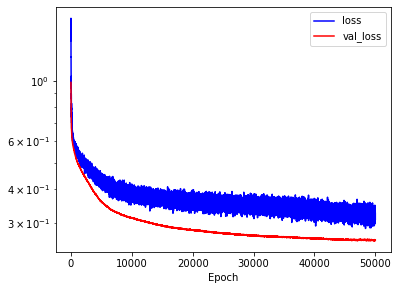

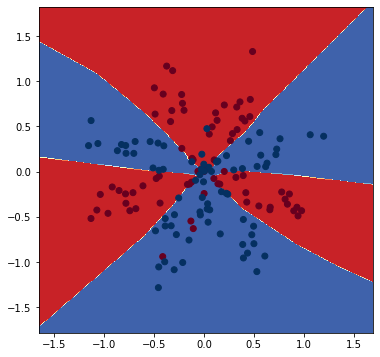

Training model :  Denormalized Dataset
Epoch 0:  Loss = 14.7256243   Val_Loss = 3.5289945
Epoch 5000:  Loss = 0.6244901   Val_Loss = 0.5890180
Epoch 10000:  Loss = 0.6141115   Val_Loss = 0.5687087
Epoch 15000:  Loss = 0.5723562   Val_Loss = 0.5408039
Epoch 20000:  Loss = 0.5729632   Val_Loss = 0.5367829
Epoch 25000:  Loss = 0.5730999   Val_Loss = 0.5188421
Epoch 30000:  Loss = 0.5553778   Val_Loss = 0.5193985
Epoch 35000:  Loss = 0.5596385   Val_Loss = 0.5124928
Epoch 40000:  Loss = 0.5585606   Val_Loss = 0.5116400
Epoch 45000:  Loss = 0.5717361   Val_Loss = 0.5090713
Training complete.
Epoch 49999:  Loss = 0.5755640   Val_Loss = 0.5049460


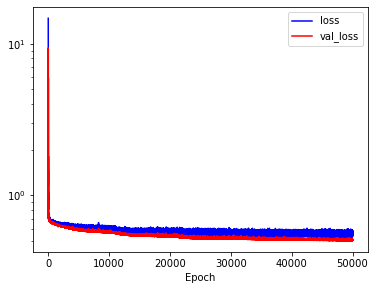

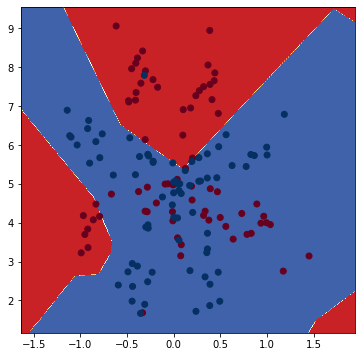

In [5]:
def test_TrainBothDatasets():
    np.random.seed(1)

    # Feature x1 nechame bez zmeny
    # Feature x2 zoskalujeme a posunieme (x2*3) + 5
    mean   = np.array([[0.0], [5.0]], dtype=float)
    stddev = np.array([[1.0], [3.0]], dtype=float)

    # Pripravime dvojmo dva datasety (aj train aj dev)
    setsTrain = prepareDatasets(600, noise=0.2, mean=mean, stddev=stddev)
    setsDev = prepareDatasets(150, noise=0.2, mean=mean, stddev=stddev)

    # Pouzijeme siet s dropoutom
    layers = [
        Input(2),
        Dense(10, act='relu'),
        Dense(15, act='relu'),
        DropOut(0.5),        
        Dense(1, act='sigmoid')
    ]

    # A vykoname ucenie
    test_TwoDatasets(setsTrain, setsDev, layers=layers)

test_TrainBothDatasets()